### importing necessary libraries

In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px


### importing dataset

In [6]:
data=pd.read_csv("Banana-Commodity.csv")
data.head()

,District Name,Market Name,Commodity,Variety,Grade,Price Date,temp,precip,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
0,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,31-12-2020,27.5,0.0,1150.0,1300.0
1,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,30-12-2020,27.0,0.0,1150.0,1300.0
2,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,29-12-2020,26.8,0.0,1150.0,1250.0
3,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,28-12-2020,27.1,0.5,1150.0,1300.0
4,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,27-12-2020,27.0,0.0,NaN,NaN


### Data Cleaning

### Handling missing values

In [7]:
data.isnull().sum()

District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Price Date                   0
temp                         0
precip                       0
Min Price (Rs./Quintal)    862
Max Price (Rs./Quintal)    862
dtype: int64

In [8]:
for column in data.columns:
    if data[column].dtype != 'object':
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)


In [9]:
data.isnull().sum()

District Name              0
Market Name                0
Commodity                  0
Variety                    0
Grade                      0
Price Date                 0
temp                       0
precip                     0
Min Price (Rs./Quintal)    0
Max Price (Rs./Quintal)    0
dtype: int64

### Removing Outliers

In [10]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
Data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [11]:
Data.head()

,District Name,Market Name,Commodity,Variety,Grade,Price Date,temp,precip,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
0,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,31-12-2020,27.5,0.0,1150.000000,1300.000000
1,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,30-12-2020,27.0,0.0,1150.000000,1300.000000
2,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,29-12-2020,26.8,0.0,1150.000000,1250.000000
3,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,28-12-2020,27.1,0.5,1150.000000,1300.000000
4,Gorakhpur,Chorichora,Banana - Green,Banana - Green,FAQ,27-12-2020,27.0,0.0,1136.201154,1296.570899


In [12]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'categorical_cols' is a list of categorical column names
data_encoded = pd.get_dummies(Data, columns=['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade'])


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Data['District Name'] = label_encoder.fit_transform(Data['District Name'])
Data['Market Name'] = label_encoder.fit_transform(Data['Market Name'])
Data['Commodity'] = label_encoder.fit_transform(Data['Commodity'])
Data['Variety'] = label_encoder.fit_transform(Data['Variety'])
Data['Grade'] = label_encoder.fit_transform(Data['Grade'])

Data.head()

,District Name,Market Name,Commodity,Variety,Grade,Price Date,temp,precip,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
0,0,0,0,0,0,31-12-2020,27.5,0.0,1150.000000,1300.000000
1,0,0,0,0,0,30-12-2020,27.0,0.0,1150.000000,1300.000000
2,0,0,0,0,0,29-12-2020,26.8,0.0,1150.000000,1250.000000
3,0,0,0,0,0,28-12-2020,27.1,0.5,1150.000000,1300.000000
4,0,0,0,0,0,27-12-2020,27.0,0.0,1136.201154,1296.570899


In [14]:
Data = Data.drop(columns=['Price Date'])

In [15]:
Data.head()

,District Name,Market Name,Commodity,Variety,Grade,temp,precip,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
0,0,0,0,0,0,27.5,0.0,1150.000000,1300.000000
1,0,0,0,0,0,27.0,0.0,1150.000000,1300.000000
2,0,0,0,0,0,26.8,0.0,1150.000000,1250.000000
3,0,0,0,0,0,27.1,0.5,1150.000000,1300.000000
4,0,0,0,0,0,27.0,0.0,1136.201154,1296.570899


### Creating dependent and independent features

In [16]:
X = Data.drop(columns=['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)'])
y = Data[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)']]

In [17]:
X

,District Name,Market Name,Commodity,Variety,Grade,temp,precip
0,0,0,0,0,0,27.5,0.0
1,0,0,0,0,0,27.0,0.0
2,0,0,0,0,0,26.8,0.0
3,0,0,0,0,0,27.1,0.5
4,0,0,0,0,0,27.0,0.0
...,...,...,...,...,...,...,...
3280,0,2,0,0,0,16.9,0.2
3283,0,2,0,0,0,13.9,0.0
3285,0,2,0,0,0,11.8,0.0
3286,0,2,0,0,0,12.4,0.0


In [18]:
y

,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
0,1150.000000,1300.000000
1,1150.000000,1300.000000
2,1150.000000,1250.000000
3,1150.000000,1300.000000
4,1136.201154,1296.570899
...,...,...
3280,1136.201154,1296.570899
3283,1136.201154,1296.570899
3285,1136.201154,1296.570899
3286,1136.201154,1296.570899


### Exploratory data analysis

In [19]:
Data.nunique()

District Name                1
Market Name                  3
Commodity                    1
Variety                      1
Grade                        1
temp                       256
precip                      73
Min Price (Rs./Quintal)     72
Max Price (Rs./Quintal)     75
dtype: int64

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2698 entries, 0 to 3287
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   District Name            2698 non-null   int32  
 1   Market Name              2698 non-null   int32  
 2   Commodity                2698 non-null   int32  
 3   Variety                  2698 non-null   int32  
 4   Grade                    2698 non-null   int32  
 5   temp                     2698 non-null   float64
 6   precip                   2698 non-null   float64
 7   Min Price (Rs./Quintal)  2698 non-null   float64
 8   Max Price (Rs./Quintal)  2698 non-null   float64
dtypes: float64(4), int32(5)
memory usage: 158.1 KB


In [21]:
# Select numerical columns for visualization
numerical_columns = ['temp','precip','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)']
numerical_columns

['temp', 'precip', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)']

In [22]:
# Univariate Analysis
Data.describe()

,District Name,Market Name,Commodity,Variety,Grade,temp,precip,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
count,2698.0,2698.000000,2698.0,2698.0,2698.0,2698.000000,2698.000000,2698.000000,2698.000000
mean,0.0,1.009637,0.0,0.0,0.0,25.327947,0.887620,1124.240043,1284.121323
std,0.0,0.807765,0.0,0.0,0.0,6.113441,1.657059,130.955567,148.460282
min,0.0,0.000000,0.0,0.0,0.0,10.700000,0.000000,850.000000,950.000000
25%,0.0,0.000000,0.0,0.0,0.0,20.600000,0.000000,1050.000000,1200.000000
50%,0.0,1.000000,0.0,0.0,0.0,26.700000,0.000000,1136.201154,1296.570899
75%,0.0,2.000000,0.0,0.0,0.0,29.600000,1.000000,1200.000000,1350.000000
max,0.0,2.000000,0.0,0.0,0.0,37.300000,7.400000,1400.000000,1670.000000


Text(0, 0.5, 'Frequency')

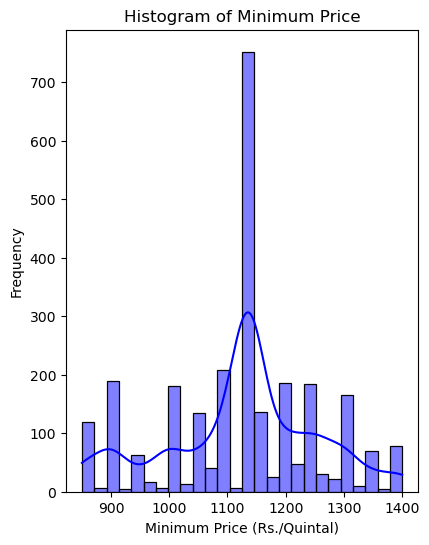

In [23]:
# Plot histograms for Minimum Price and Maximum Price
plt.figure(figsize=(10, 6))

# Histogram for Minimum Price
plt.subplot(1, 2, 1)
sns.histplot(Data['Min Price (Rs./Quintal)'], kde=True, color='blue')
plt.title('Histogram of Minimum Price')
plt.xlabel('Minimum Price (Rs./Quintal)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

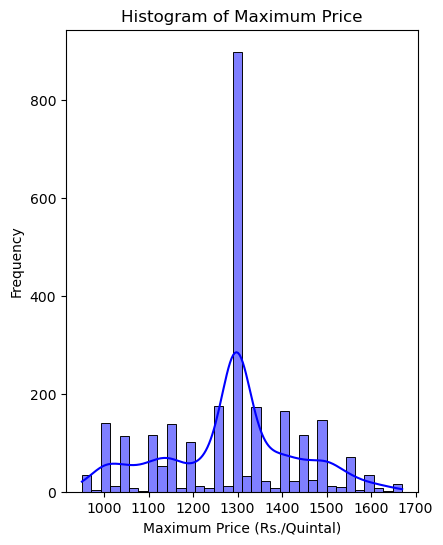

In [24]:
# Plot histograms for Minimum Price and Maximum Price
plt.figure(figsize=(10, 6))

# Histogram for Minimum Price
plt.subplot(1, 2, 1)
sns.histplot(Data['Max Price (Rs./Quintal)'], kde=True, color='blue')
plt.title('Histogram of Maximum Price')
plt.xlabel('Maximum Price (Rs./Quintal)')
plt.ylabel('Frequency')

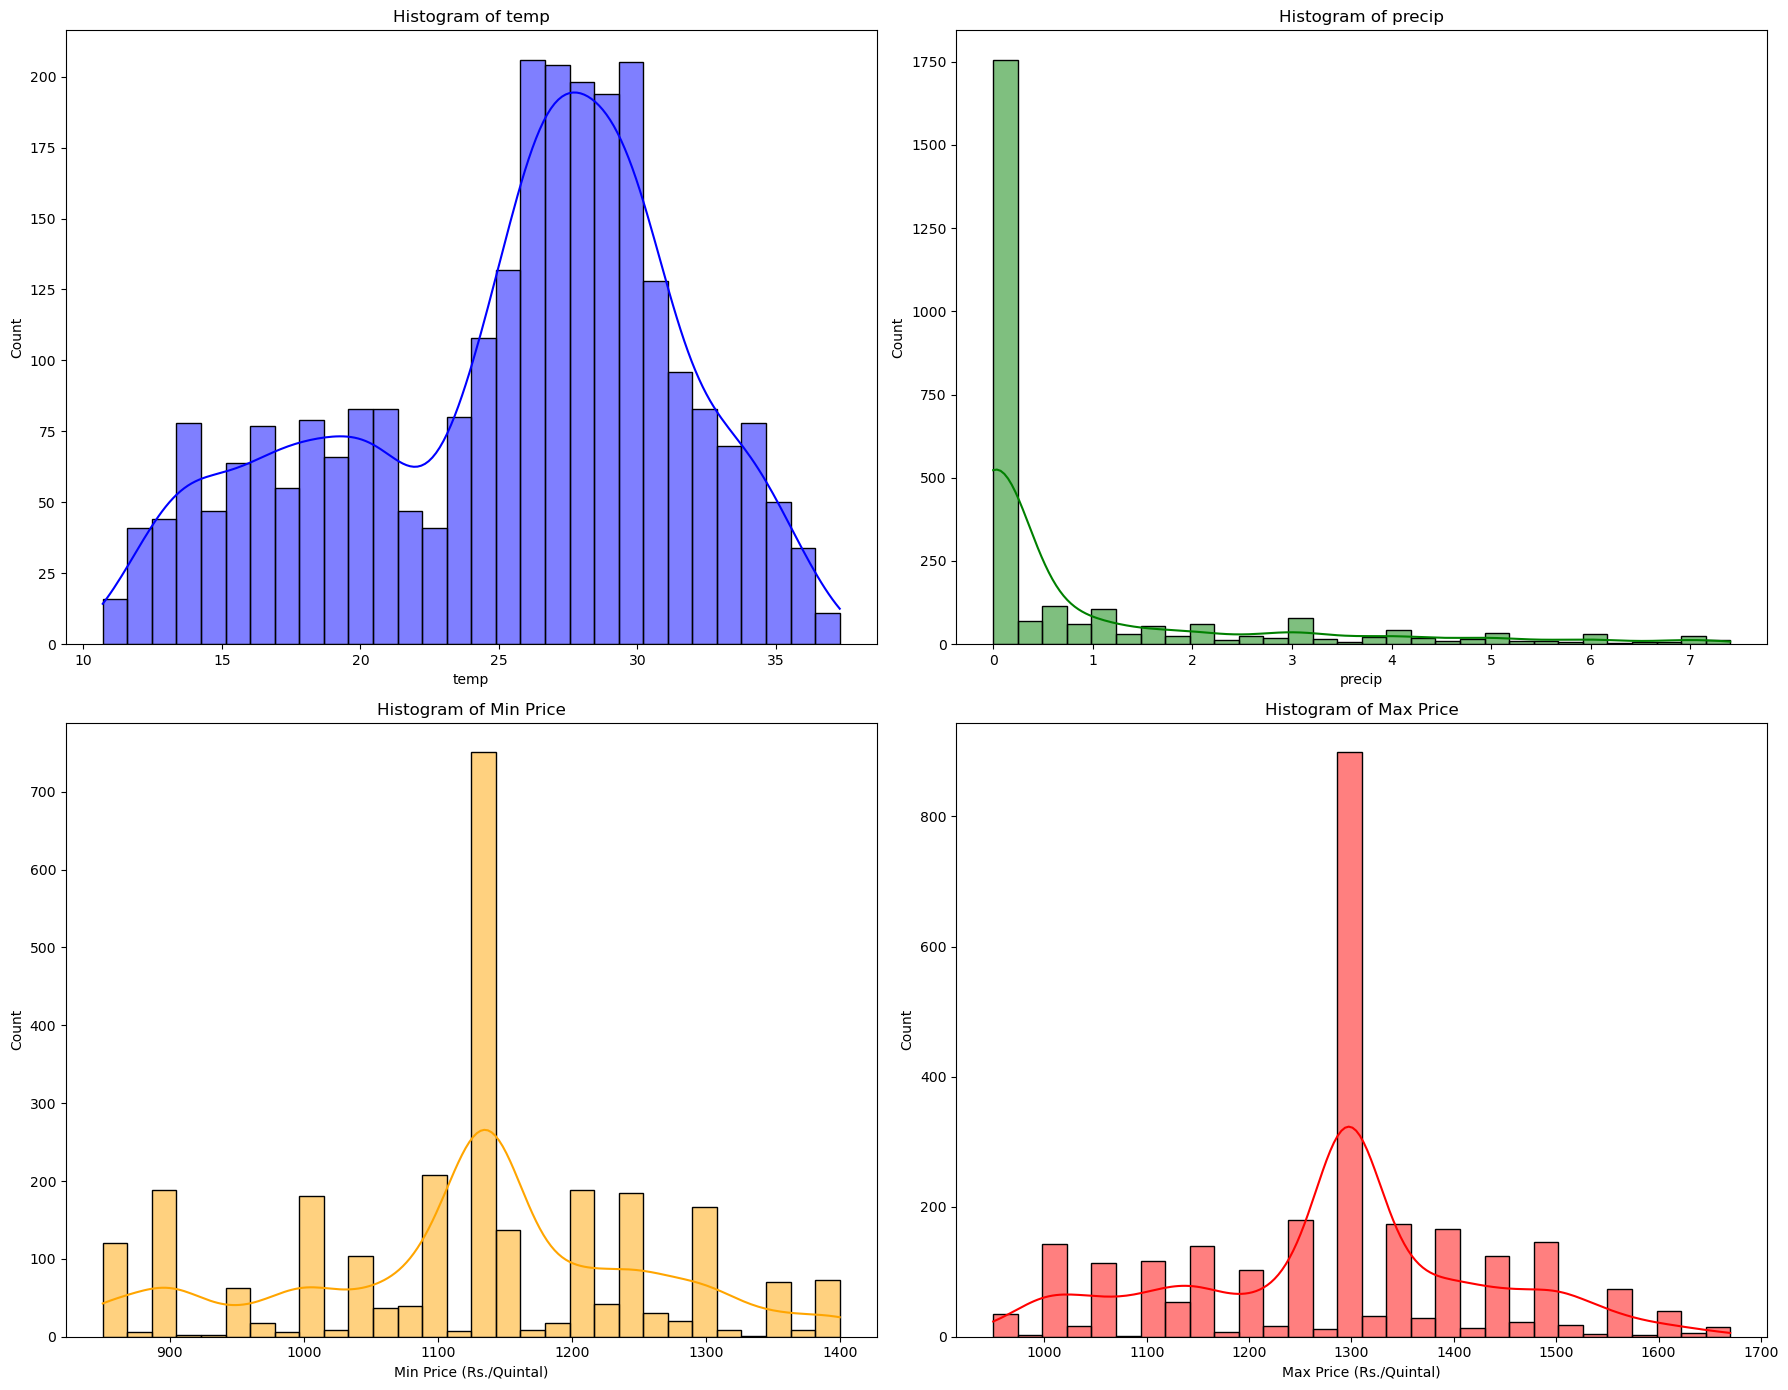

In [25]:
# Set up subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))

# First histogram
sns.histplot(x='temp', data=Data, ax=axes[0, 0], bins=30, kde=True, color='blue')
axes[0, 0].set_title('Histogram of temp')

# Second histogram
sns.histplot(x='precip', data=Data, ax=axes[0, 1], bins=30, kde=True, color='green')
axes[0, 1].set_title('Histogram of precip')

# Third histogram
sns.histplot(x='Min Price (Rs./Quintal)', data=Data, ax=axes[1, 0], bins=30, kde=True, color='orange')
axes[1, 0].set_title('Histogram of Min Price')

# Fourth histogram
sns.histplot(x='Max Price (Rs./Quintal)', data=Data, ax=axes[1, 1], bins=30, kde=True, color='red')
axes[1, 1].set_title('Histogram of Max Price')

# Display the plot
plt.tight_layout()
plt.show()


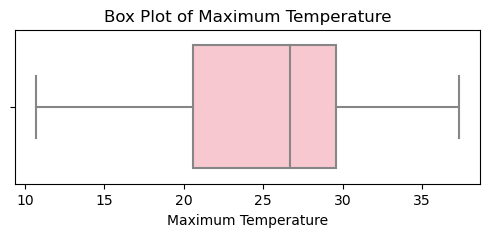

In [26]:
# Box plot
plt.figure(figsize=(6, 2))
sns.boxplot(Data['temp'], color='pink')
plt.title('Box Plot of Maximum Temperature')
plt.xlabel('Maximum Temperature')
plt.show()


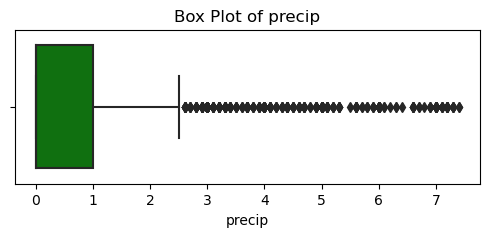

In [27]:
# Box plot
plt.figure(figsize=(6, 2))
sns.boxplot(Data['precip'], color='green')
plt.title('Box Plot of precip')
plt.xlabel('precip')
plt.show()


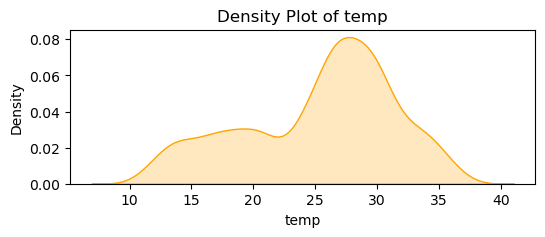

In [28]:
# Density plot
plt.figure(figsize=(6,2))
sns.kdeplot(Data['temp'], shade=True, color='orange')
plt.title('Density Plot of temp')
plt.xlabel('temp')
plt.ylabel('Density')
plt.show()

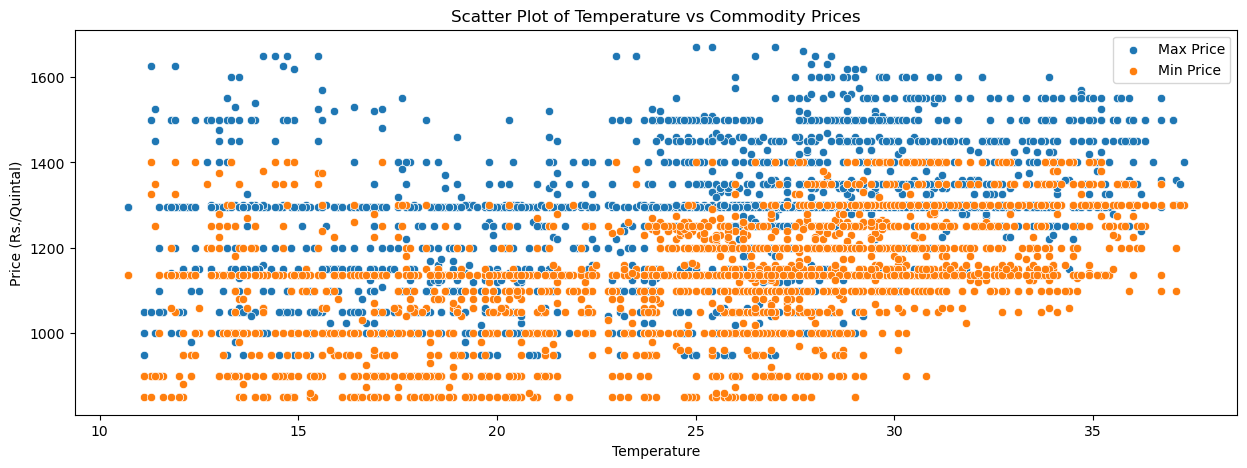

In [29]:
# Bivariate Analysis
# Scatter plot
# Bivariate Analysis: Scatter plot
plt.figure(figsize=(15, 5))
sns.scatterplot(x='temp', y='Max Price (Rs./Quintal)', data=Data)
sns.scatterplot(x='temp', y='Min Price (Rs./Quintal)', data=Data)
plt.title('Scatter Plot of Temperature vs Commodity Prices')
plt.xlabel('Temperature')
plt.ylabel('Price (Rs./Quintal)')
plt.legend(['Max Price', 'Min Price'])
plt.show()


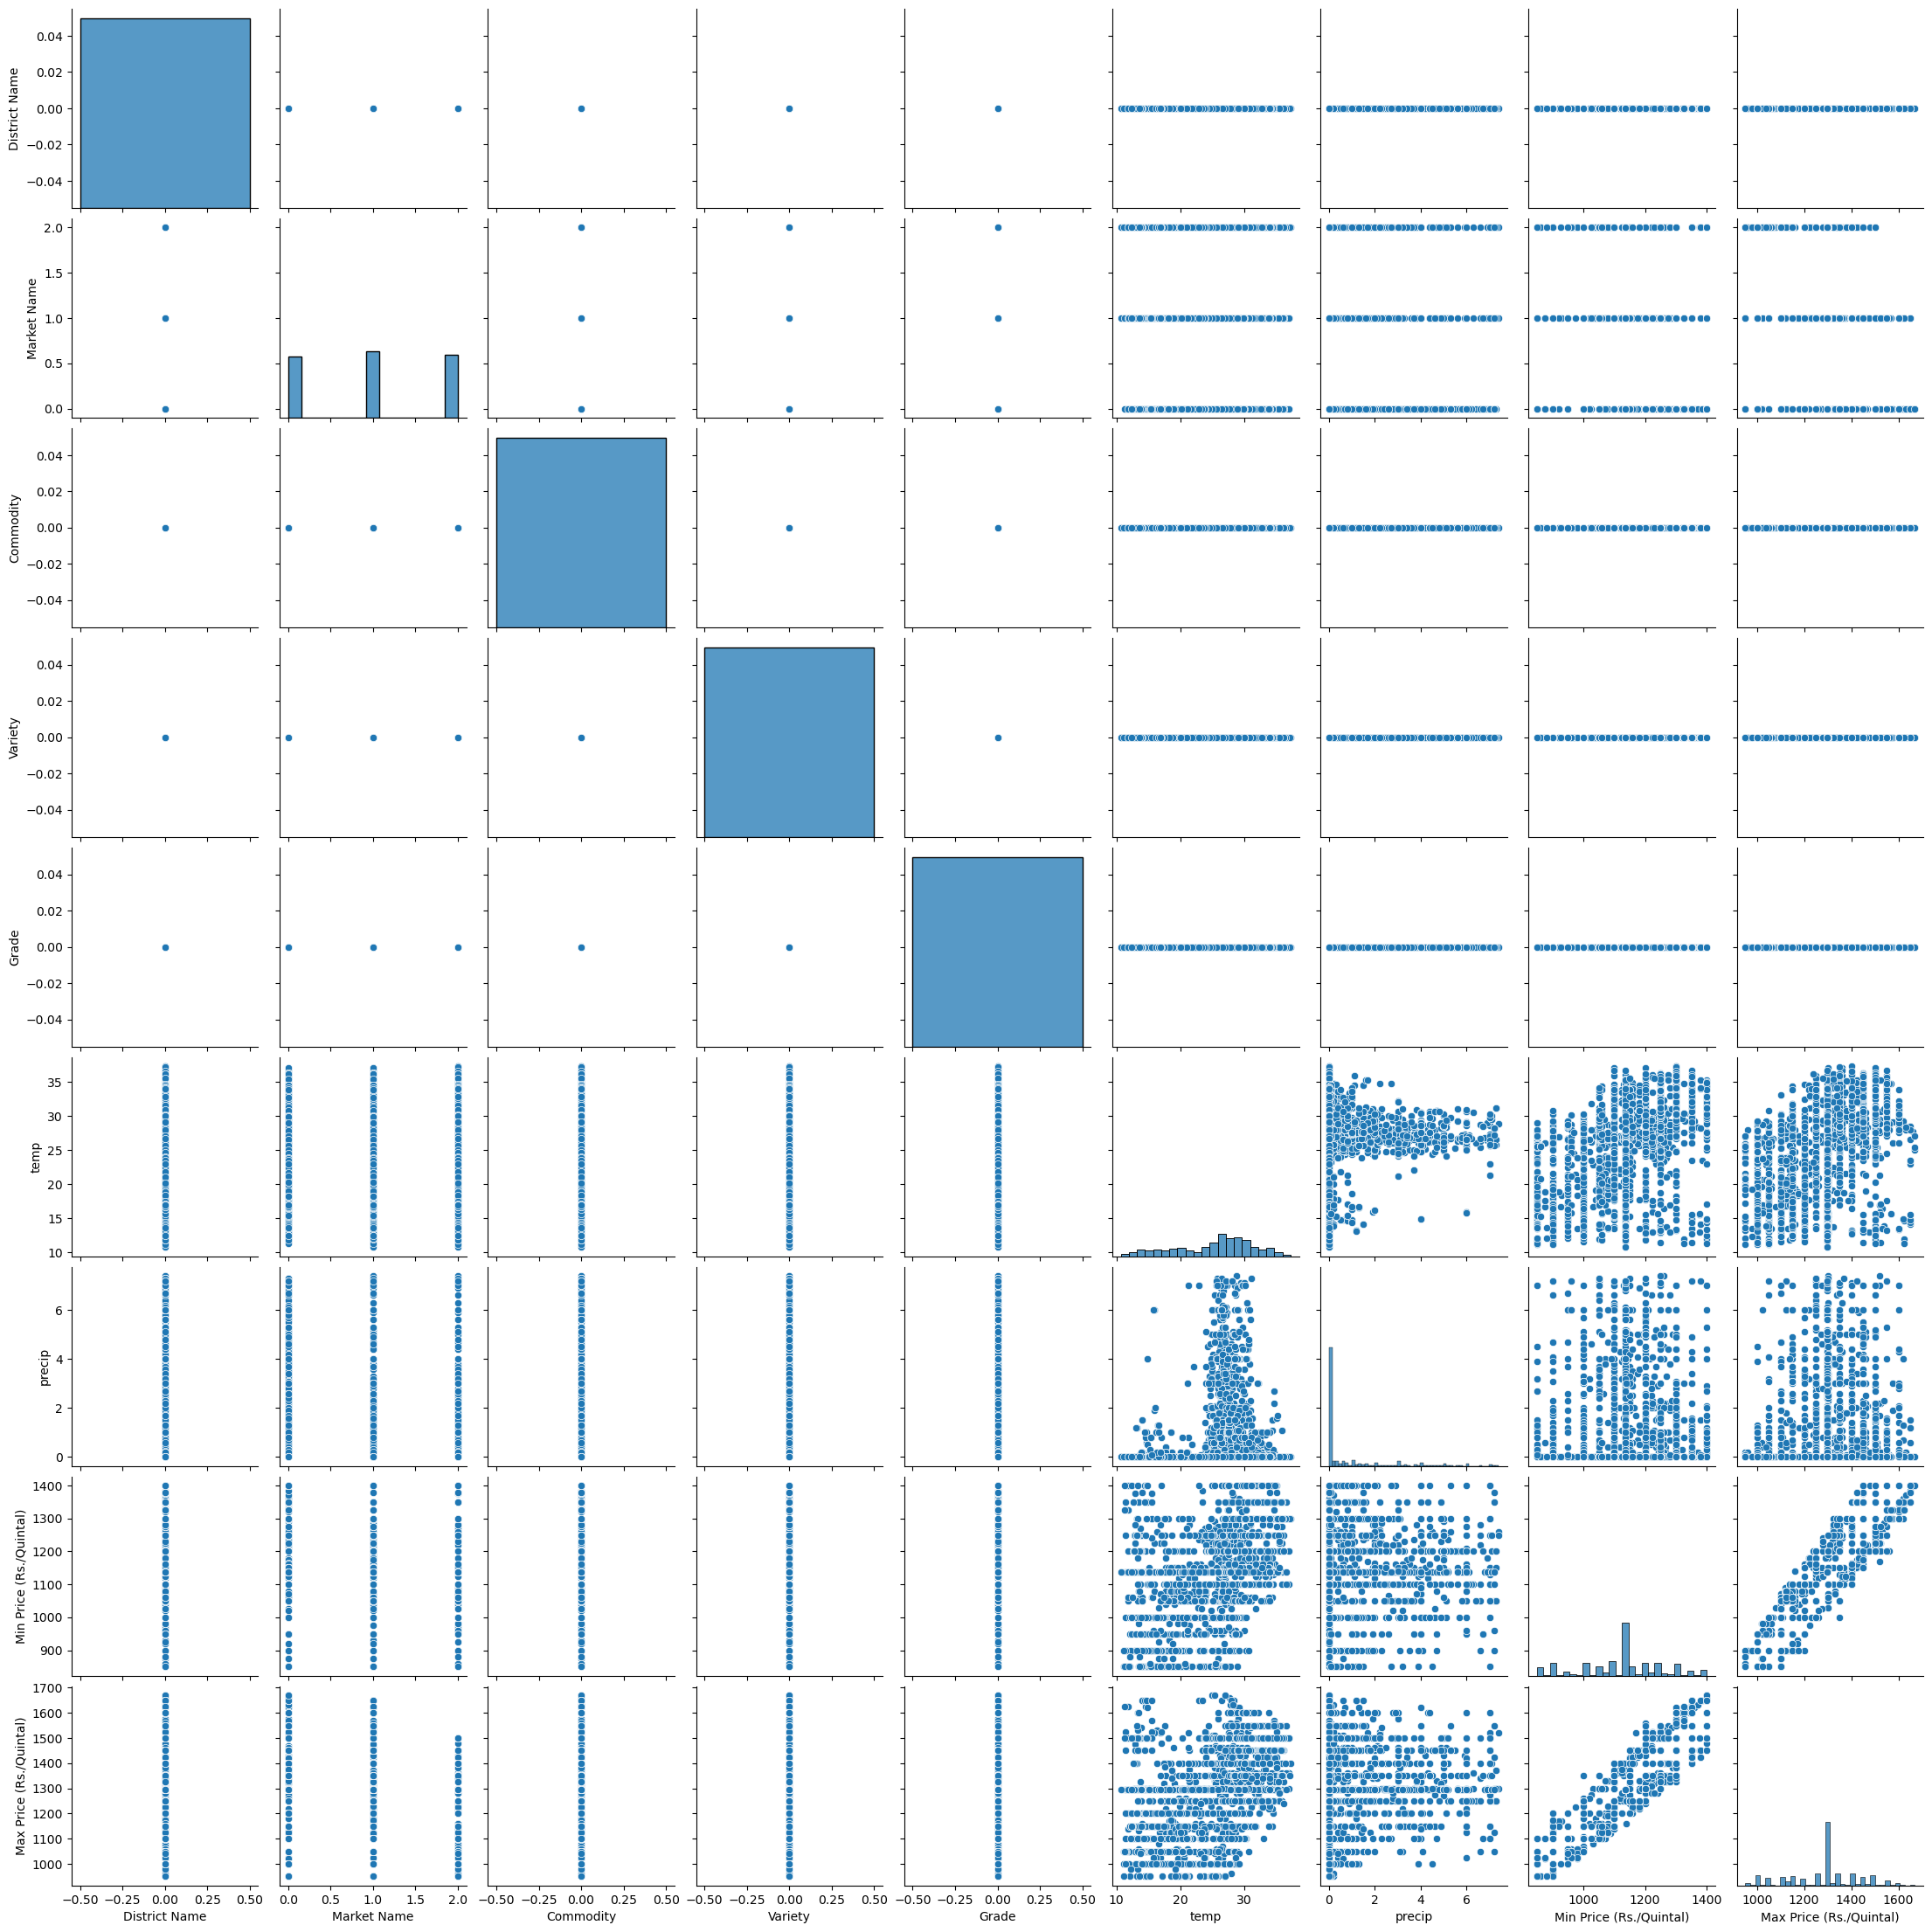

<Figure size 200x400 with 0 Axes>

In [30]:
# Bivariate analysis
# Example: Scatter plot matrix for numerical variables
sns.pairplot(Data)
plt.figure(figsize=(2, 4))
plt.show()

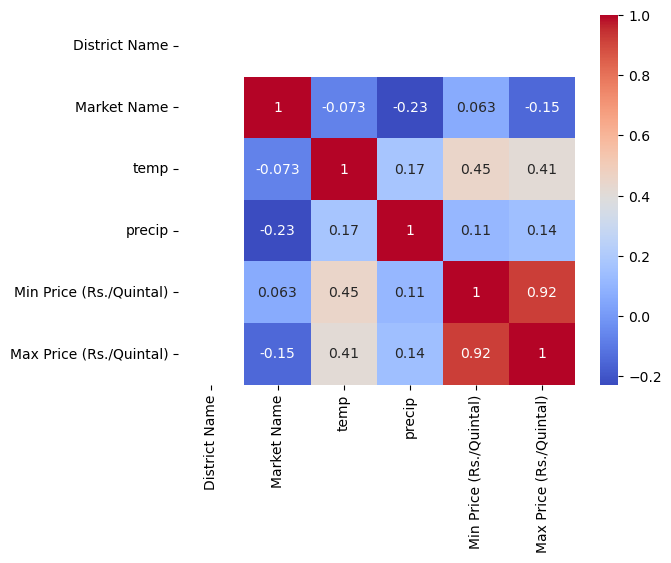

In [31]:
# correlation heatmap except column commodity , variety and grade
# Select the relevant columns
comm_data_selected = Data.drop(['Commodity', 'Variety', 'Grade'], axis=1)

# Calculate the correlation matrix
corr = comm_data_selected.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### From the above correlation matrix it is conclude that all the features are important.

### Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

# Filter out non-numeric columns
numeric_data = Data.select_dtypes(include=['int64', 'float64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_standardized = scaler.fit_transform(numeric_data)

# Convert the scaled data back to DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=numeric_data.columns)


### Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Filter out non-numeric columns
numeric_data = Data.select_dtypes(include=['int64', 'float64'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
data_normalized = scaler.fit_transform(numeric_data)

# Convert the scaled data back to DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=numeric_data.columns)


### Data Splitting

In [34]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train

,District Name,Market Name,Commodity,Variety,Grade,temp,precip
2791,0,1,0,0,0,33.8,0.3
2799,0,1,0,0,0,31.0,0.0
2736,0,1,0,0,0,34.7,0.0
1936,0,2,0,0,0,28.1,0.9
2803,0,1,0,0,0,32.4,0.0
...,...,...,...,...,...,...,...
2021,0,2,0,0,0,28.7,0.7
1386,0,0,0,0,0,25.3,1.2
1429,0,0,0,0,0,28.0,0.0
1619,0,1,0,0,0,29.7,7.0


In [36]:
y_train

,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
2791,1250.000000,1400.000000
2799,1250.000000,1450.000000
2736,1300.000000,1560.000000
1936,1150.000000,1240.000000
2803,1250.000000,1450.000000
...,...,...
2021,1250.000000,1340.000000
1386,1100.000000,1250.000000
1429,900.000000,1000.000000
1619,1250.000000,1450.000000


In [37]:
X_test

,District Name,Market Name,Commodity,Variety,Grade,temp,precip
1682,0,1,0,0,0,30.0,0.0
1524,0,1,0,0,0,21.2,0.0
1404,0,0,0,0,0,27.2,2.6
1021,0,2,0,0,0,21.5,0.0
1533,0,1,0,0,0,23.2,0.1
...,...,...,...,...,...,...,...
1211,0,0,0,0,0,25.8,0.4
945,0,2,0,0,0,31.7,0.8
1381,0,0,0,0,0,25.6,5.0
1163,0,0,0,0,0,25.7,1.1


In [38]:
y_test

,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
1682,1200.000000,1350.000000
1524,1136.201154,1296.570899
1404,1136.201154,1296.570899
1021,1280.000000,1325.000000
1533,1000.000000,1250.000000
...,...,...
1211,1100.000000,1250.000000
945,1200.000000,1280.000000
1381,1060.000000,1300.000000
1163,1050.000000,1250.000000


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from statsmodels.tsa.arima.model import ARIMA

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


### Machine Learning Models

In [41]:
# Train the linear regression model
model_min = LinearRegression()
model_min.fit(X_train, y_train)

model_max = LinearRegression()
model_max.fit(X_train, y_train)

pred_min = model_min.predict(X_test)
pred_max = model_max.predict(X_test)

# Evaluate the model
r2_min = r2_score(y_test, pred_min)
mse_min = mean_squared_error(y_test, pred_min)

r2_max = r2_score(y_test, pred_max)
mse_max = mean_squared_error(y_test, pred_max)

print(f"Linear Regression Min Price - R2 Score: {r2_min}, MSE: {mse_min}")
print(f"Linear Regression Max Price - R2 Score: {r2_max}, MSE: {mse_max}")


Linear Regression Min Price - R2 Score: 0.3238614638877347, MSE: 16966.231751762796
Linear Regression Max Price - R2 Score: 0.3238614638877347, MSE: 16966.231751762796


In [42]:
# k-Nearest Neighbors for Multioutput Regression

from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define the model
model = MultiOutputRegressor(KNeighborsRegressor())

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data
predictions = model.predict(X_test)

# Evaluate the model
r2_score_min = r2_score(y_test['Min Price (Rs./Quintal)'], predictions[:, 0])
r2_score_max = r2_score(y_test['Max Price (Rs./Quintal)'], predictions[:, 1])

print("R2 score for min price:", r2_score_min)
print("R2 score for max price:", r2_score_max)


R2 score for min price: 0.17592941811427587
R2 score for max price: 0.19632367790866245


In [43]:
# Random Forest Model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(r2_rf)
print(mse_rf)

0.11550404230990713
22109.250174773042


In [44]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt_min = DecisionTreeRegressor()
dt_min.fit(X_train, y_train)

dt_max = DecisionTreeRegressor()
dt_max.fit(X_train, y_train)

# Make predictions
pred_dt_min = dt_min.predict(X_test)
pred_dt_max = dt_max.predict(X_test)

# Evaluate the model
r2_min_dt = r2_score(y_test, pred_dt_min)
mse_min_dt = mean_squared_error(y_test, pred_dt_min)
r2_max_dt = r2_score(y_test, pred_dt_max)
mse_max_dt = mean_squared_error(y_test, pred_dt_max)

print(f"Decision Tree Min Price - R2 Score: {r2_min_dt}, MSE: {mse_min_dt}")
print(f"Decision Tree Max Price - R2 Score: {r2_max_dt}, MSE: {mse_max_dt}")



Decision Tree Min Price - R2 Score: -0.057705129125225185, MSE: 26449.385709864186
Decision Tree Max Price - R2 Score: -0.059472545593212356, MSE: 26488.484222368894


In [45]:
from xgboost import XGBRegressor

# Train the model
xgb_min = XGBRegressor()
xgb_min.fit(X_train, y_train)

xgb_max = XGBRegressor()
xgb_max.fit(X_train, y_train)

# Make predictions
pred_xgb_min = xgb_min.predict(X_test)
pred_xgb_max = xgb_max.predict(X_test)

# Evaluate the model
r2_min_xgb = r2_score(y_test, pred_xgb_min)
mse_min_xgb = mean_squared_error(y_test, pred_xgb_min)
r2_max_xgb = r2_score(y_test, pred_xgb_max)
mse_max_xgb = mean_squared_error(y_test, pred_xgb_max)

print(f"XGBoost Min Price - R2 Score: {r2_min_xgb}, MSE: {mse_min_xgb}")
print(f"XGBoost Max Price - R2 Score: {r2_max_xgb}, MSE: {mse_max_xgb}")


XGBoost Min Price - R2 Score: 0.144392621148773, MSE: 21379.237158886473
XGBoost Max Price - R2 Score: 0.144392621148773, MSE: 21379.237158886473


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
data = Data

# Separate features and targets
X = Data.drop(columns=['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)'])
y_min = Data['Min Price (Rs./Quintal)']
y_max = Data['Max Price (Rs./Quintal)']

# Handle any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')
y_min = y_min.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')
y_max = y_max.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')

# Ensure no NaN values remain
assert not X.isnull().values.any(), "X contains NaN values"
assert not y_min.isnull().values.any(), "y_min contains NaN values"
assert not y_max.isnull().values.any(), "y_max contains NaN values"

# Train-test split
X_train, X_test, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, shuffle=False)
_, _, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, shuffle=False)


### Deep Learning Models

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN for Min Price
ann_min = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
ann_min.compile(optimizer='adam', loss='mean_squared_error')
ann_min.fit(X_train, y_train_min, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# ANN for Max Price
ann_max = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
ann_max.compile(optimizer='adam', loss='mean_squared_error')
ann_max.fit(X_train, y_train_max, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions
pred_ann_min = ann_min.predict(X_test).flatten()
pred_ann_max = ann_max.predict(X_test).flatten()

# Evaluate the model
r2_min_ann = r2_score(y_test_min, pred_ann_min)
mse_min_ann = mean_squared_error(y_test_min, pred_ann_min)
r2_max_ann = r2_score(y_test_max, pred_ann_max)
mse_max_ann = mean_squared_error(y_test_max, pred_ann_max)

print(f"ANN Min Price - R2 Score: {r2_min_ann}, MSE: {mse_min_ann}")
print(f"ANN Max Price - R2 Score: {r2_max_ann}, MSE: {mse_max_ann}")


17/17 [==============================] - 0s 2ms/step
ANN Min Price - R2 Score: -0.9211617061251902, MSE: 44282.3614564454
ANN Max Price - R2 Score: -1.6894788299993433, MSE: 72678.20741461766


### Time series models

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# LSTM for Min Price
lstm_min = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50),
    Dense(1)
])
lstm_min.compile(optimizer='adam', loss='mean_squared_error')
lstm_min.fit(X_train_lstm, y_train_min, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# LSTM for Max Price
lstm_max = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50),
    Dense(1)
])
lstm_max.compile(optimizer='adam', loss='mean_squared_error')
lstm_max.fit(X_train_lstm, y_train_max, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions
pred_lstm_min = lstm_min.predict(X_test_lstm).flatten()
pred_lstm_max = lstm_max.predict(X_test_lstm).flatten()

# Evaluate the model
r2_min_lstm = r2_score(y_test_min, pred_lstm_min)
mse_min_lstm = mean_squared_error(y_test_min, pred_lstm_min)
r2_max_lstm = r2_score(y_test_max, pred_lstm_max)
mse_max_lstm = mean_squared_error(y_test_max, pred_lstm_max)

print(f"LSTM Min Price - R2 Score: {r2_min_lstm}, MSE: {mse_min_lstm}")
print(f"LSTM Max Price - R2 Score: {r2_max_lstm}, MSE: {mse_max_lstm}")


17/17 [==============================] - 1s 3ms/step
LSTM Min Price - R2 Score: -44.84254427276226, MSE: 1056660.7220502633
LSTM Max Price - R2 Score: -49.4098072125093, MSE: 1362232.1110899153


### Save the model

In [49]:
import pickle

# Save the models' R2 scores
r2_scores = [r2_min_dt, r2_max_dt]
with open('model.pkl', 'wb') as file:
    pickle.dump(r2_scores, file)


In [54]:
import pickle
from sklearn.tree import DecisionTreeRegressor

# Example model training (replace with your actual training code)
model = DecisionTreeRegressor()
# Assume X_train and y_train are defined
model.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


### Graphical User Interface(GUI)

In [50]:
import tkinter as tk
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from tkinter import messagebox

# Load the dataset
data = pd.read_csv('Banana-Commodity.csv')

# Extract features and target variable
# Assuming 'Min Price (Rs./Quintal)' and 'Max Price (Rs./Quintal)' are the target variables in your dataset
X = Data[['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade', 'temp', 'precip']]
y = Data[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)']]

# Preprocessing: Convert categorical variables to numerical using one-hot encoding or label encoding as necessary
X = pd.get_dummies(X)

# Train the regression model
model = DecisionTreeRegressor()
model.fit(X, y)

def predict_price():
    try:
        # Get user input
        district_name = entries[0].get()
        market_name = entries[1].get()
        commodity = entries[2].get()
        variety = entries[3].get()
        grade = entries[4].get()
        temp = float(entries[5].get())
        precip = float(entries[6].get())
        
        # Prepare input data
        input_data = pd.DataFrame([[district_name, market_name, commodity, variety, grade, temp, precip]], 
                                  columns=['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade', 'temp', 'precip'])
        input_data = pd.get_dummies(input_data)
        
        # Ensure the input data has the same columns as the training data
        input_data = input_data.reindex(columns=X.columns, fill_value=0)
        
        # Perform prediction
        predicted_prices = model.predict(input_data)[0]
        result_label.config(text=f"The predicted Min Price is {predicted_prices[0]:.2f} and Max Price is {predicted_prices[1]:.2f}")
    except ValueError:
        result_label.config(text="Please enter valid inputs.")

# Create GUI window
window = tk.Tk()
window.title("Market Price Prediction")

# Create labels and entry fields for user input
labels = ['District Name:', 'Market Name:', 'Commodity:', 'Variety:', 'Grade:', 'Temp:', 'Precip:']
entries = []

for i, label_text in enumerate(labels):
    tk.Label(window, text=label_text).grid(row=i, column=0, padx=10, pady=5)
    entry = tk.Entry(window)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

# Create a button to trigger prediction
predict_button = tk.Button(window, text="Predict Price", command=predict_price)
predict_button.grid(row=len(labels), columnspan=2, pady=10)

# Create label to display prediction result
result_label = tk.Label(window, text="")
result_label.grid(row=len(labels) + 1, columnspan=2, pady=10)

window.mainloop()

